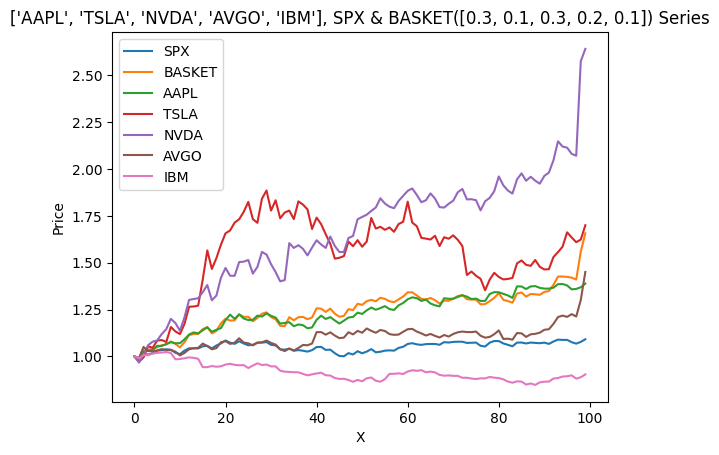

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from underlyings.stock import Stock
from underlyings.index import Index
from underlyings.basket import Basket
from datetime import datetime

stock_symbols = ["AAPL","TSLA", "NVDA","AVGO","IBM"]
weights = [0.3, 0.1, 0.3, 0.2, 0.1]
start_date =  pd.to_datetime('2023-01-04')
end_date = datetime.today().strftime('%Y-%m-%d')

spx = Index("SPX")
bs = Basket(stock_symbols, weights)

df_spx = spx.get_quotes(start_date, end_date)
df_spx = df_spx.div(df_spx.iloc[0])

df_bs = bs.get_quotes(start_date,end_date)
df_bs = df_bs.div(df_bs.iloc[0])

plt.plot(df_spx, label='SPX')
plt.plot(df_bs, label='BASKET')

for symbol in stock_symbols:
    
    df_stock = Stock(symbol).get_quotes(start_date, end_date) 
    df_stock = df_stock.div(df_stock.iloc[0])
    
    plt.plot(df_stock, label=symbol)
    
# Setting the title and labels
plt.title(f'{stock_symbols}, SPX & BASKET({weights}) Series')
plt.xlabel('X')
plt.ylabel('Price')

# Adding the legend
plt.legend()
